### Pandas

#### Assignment 1.
pandas datareader library는 data를 읽어들여 pandas의 dataframe 객체로 저장하는데 도움이 되는 라이브러리 입니다

In [1]:
#pip install pandas_datareader
import datetime
import pandas_datareader as wb

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2024, 2, 20)
null = wb.DataReader("KOSPI", "naver", start, end)
series = null['Close'].dropna().astype('float')

series는 2012년 1월 1일부터 2024년 2월 20일까지의 코스피 데이터가 저장되어 있는 Pandas Series 객체입니다

In [2]:
import numpy as np, pandas as pd
series

Date
2012-01-02    1826.37
2012-01-03    1875.41
2012-01-04    1866.22
2012-01-05    1863.74
2012-01-06    1843.14
               ...   
2024-02-14    2620.42
2024-02-15    2613.80
2024-02-16    2648.76
2024-02-19    2680.26
2024-02-20    2657.79
Name: Close, Length: 2988, dtype: float64

5일, 20일, 60일, 120일 이동평균을 계산하는 함수(혹은 클래스)를 작성하고 결과를 출력하세요

In [3]:
def moving_average(series, num):
    average = []
    for i in range(num, len(series.values) + 1):
        mean=(series.values[i-num : i].sum())/num
        average.append(mean)
    result = pd.Series(
        average, index = series.index[num - 1 : ]
    )
    return result

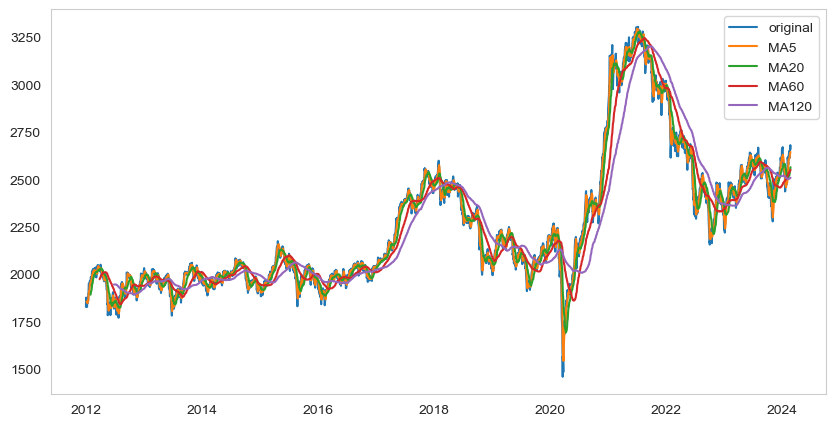

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(series, label = 'original')
plt.plot(moving_average(series, 5), label = 'MA5')
plt.plot(moving_average(series, 20), label = 'MA20')
plt.plot(moving_average(series, 60), label = 'MA60')
plt.plot(moving_average(series, 120), label = 'MA120')
plt.grid(False)
plt.legend()
plt.show()

pandas의 내장 method `rolling.mean(window = n)`을 사용해 이동평균값을 계산하세요. 두 값은 차이가 있나요?

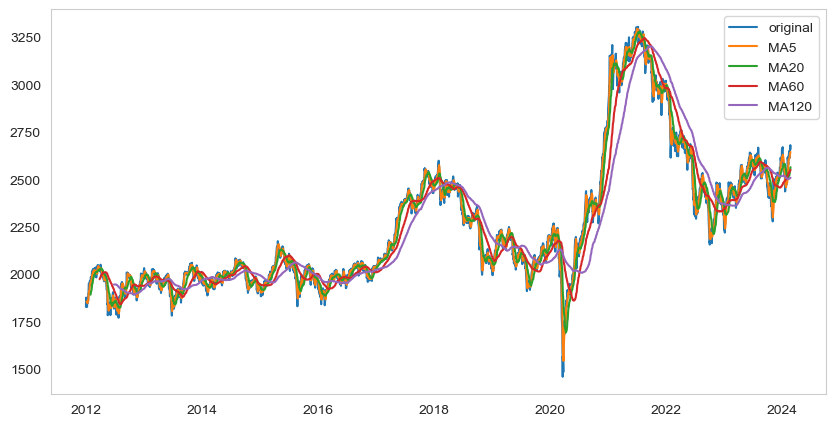

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(series, label = 'original')
plt.plot(series.rolling(window = 5).mean(), label = 'MA5')
plt.plot(series.rolling(window = 20).mean(), label = 'MA20')
plt.plot(series.rolling(window = 60).mean(), label = 'MA60')
plt.plot(series.rolling(window = 120).mean(), label = 'MA120')
plt.grid(False)
plt.legend()
plt.show()

#### Assignment 2.
1번에 사용한 series를 활용해 다음을 수행하세요

**Assignment 2-1**
- 시계열 데이터의 안정성을 위해 로그 차분 데이터를 사용합니다. 로그 차분은 다음과 같이 계산됩니다

$$r_t = \ln{P_t} - \ln{P_{t-1}}$$

- $r_t$는 수익률, 즉 로그 차분이며, $P$는 가격 데이터입니다. t는 어느 한 기간을 의미합니다.

Series를 활용해 로그 차분 데이터를 생성하세요

In [6]:
import numpy as np

ret = np.log(series / series.shift(1)).dropna()

<Axes: title={'center': 'return series'}, xlabel='Date'>

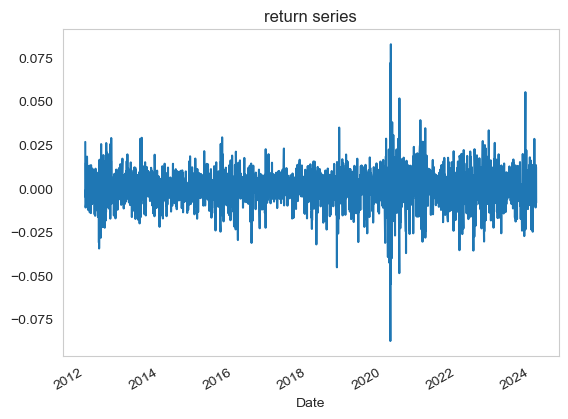

In [7]:
ret.plot(grid = False, title = 'return series')

**Assignment 2-2**

series에 표시된 NaN값을 제거한 뒤, 다음을 수행하세요

- 수익률이 변동한다는 것을 'Risk'라고 하며, 기간 리스크는 어느 한 기간의 수익률의 표준편차로 계산됩니다.

2024년 1월 1일부터 2024년 2월 20일의 기간동안의 KOSPI의 추정된 위험은 얼마입니까?

In [8]:
print(f'Estimated Volatility :{ret["2024-01":].std() : .4f}')

Estimated Volatility : 0.0109


2023년 9월 1일부터 2023년 12월 31일까지의 KOSPI의 추정된 위험은 얼마입니까?

In [9]:
print(f'Estimated Volatility :{ret["2023-09":"2023-12"].std() : .4f}')

Estimated Volatility : 0.0119


기간별 위험은 어느 쪽이 더 크게 추정되는지 확인해 보세요. 리스크는 언제가 더 큽니까?

2023년 9월 1일부터 2023년 12월 31일까지의 위험이 더 크게 추정된다.

#### Assignment 3.
이동평균선에 관련된 지표는 다음과 같은 것들이 있습니다
- MACD : 단기 이동평균(5일) - 장기 이동평균(60일)

$$\mathbf{MACD} = \mathbf{MA}(5) - \mathbf{MA}(60)$$

- Signal : MACD의 이동 평균값

$$\mathbf{Signal} = \mathbf {MA(MACD)}$$

- Stochastic : 일정기간의 가격 변동폭 중 현재의 위치를 백분율로 표시한 것

$$\frac{P_t - \min(P)}{\max{(P)} - \min{(P)}}$$

MACD를 구하는 함수와 5개의 MACD를 이용해 Signal을 계산하는 함수, Stochastic을 계산하는 함수를 만들어 pandas의 series형태로 출력하세요

In [10]:
def get_macd(series, short_window = 5, long_window = 60) :
    result = series.rolling(window = short_window).mean() - series.rolling(window = long_window).mean()
    return result

def get_signal(series, window = 21) :
    result = series.rolling(window = window).mean()
    return result

def get_stochastic(series, window=60):
    lowest_low = series.rolling(window=window).min()
    highest_high = series.rolling(window=window).max()
    stochastic = (series - lowest_low) / (highest_high - lowest_low)
    
    return stochastic[window-1:]

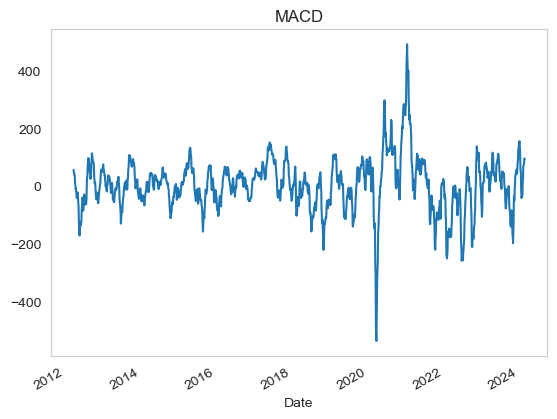

In [11]:
get_macd(series, 5, 60).plot(
    grid = False,
    title = 'MACD'
)
plt.show()

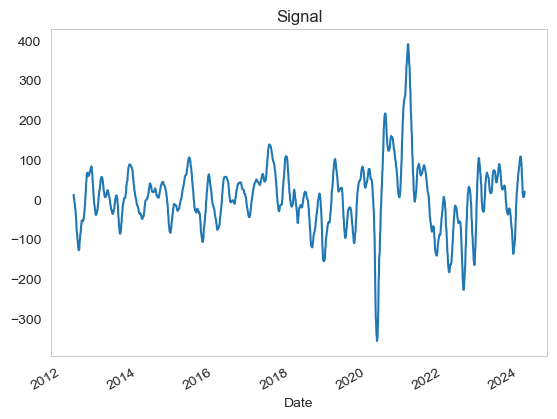

In [12]:
get_signal(get_macd(series, 5, 60), 21).plot(
    grid = False,
    title = 'Signal'
)
plt.show()

<Axes: title={'center': 'Stochastic'}, xlabel='Date'>

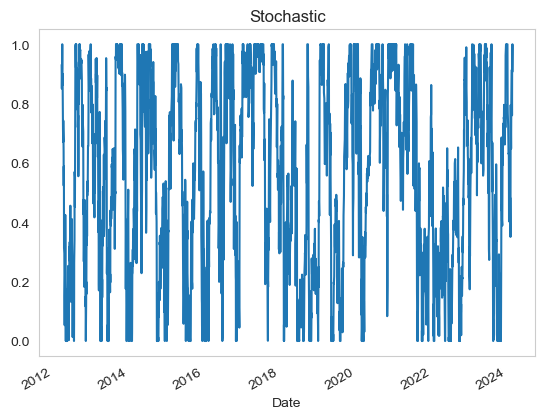

In [13]:
get_stochastic(series, window = 60).plot(
    grid = False,
    title = 'Stochastic'
)

#### Assignment 4.

자산운용사 A씨는 EMP 포트폴리오를 계획중입니다. EMP상품을 개발하기 위해 다음과 같은 자산을 고려하고 있습니다.

- 위험자산 : Apple, IBM, TESLA, Google
- 국채 : 미국 5년물, 미국 30년물
- 원자재 : 텍사스 중질류 (Crude oil), 금

한편, yfinance에서 위 자산들의 ticker는 다음과 같습니다. 단, 원자재는 데이터 수집의 용이성을 위해 선물 데이터를 사용합니다.

['AAPL','IBM','TSLA','GOOGL','^FVX','^TYX','CL=F','GC=F']

- 2018년 1월 1일부터 2024년 2월 22일까지의 데이터를 사용하세요.
- 포트폴리오 수익률을 계산하기 위해서는 우선 `pct_change()`를 통해 일별 수익률을 계산한 뒤, 비중과 수익률을 계산해야 합니다.

In [14]:
import yfinance as yf
start_date = '2020-01-01'
end_date = '2024-02-20'

tickers = ['AAPL','IBM','TSLA','GOOGL','^FVX','^TYX','CL=F','GC=F']
markets = pd.DataFrame()

for i in tickers :
    markets = pd.concat(
        [markets, yf.download(i, start_date, end_date)['Close']],
        axis = 1 # 오른쪽으로 붙인다
    )
markets.columns = tickers

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
ret = markets.pct_change(fill_method = None).dropna()

In [16]:
ret

,AAPL,IBM,TSLA,GOOGL,^FVX,^TYX,CL=F,GC=F
2020-01-03,-0.009722,-0.007975,0.029633,-0.005231,-0.050868,-0.039299,0.030566,0.016202
2020-01-06,0.007968,-0.001787,0.019255,0.026654,0.015763,0.014228,0.003489,0.010973
2020-01-07,-0.004703,0.000671,0.038801,-0.001932,0.004966,0.010522,-0.009009,0.003576
2020-01-08,0.016086,0.008346,0.049205,0.007118,0.028413,0.022993,-0.049282,-0.009161
2020-01-09,0.021241,0.010568,-0.021945,0.010498,-0.006006,-0.011875,-0.000839,-0.003660
...,...,...,...,...,...,...,...,...
2024-02-12,-0.009002,-0.000966,-0.028104,-0.009866,-0.005541,-0.002511,0.001041,-0.002521
2024-02-13,-0.011274,-0.013214,-0.021847,-0.016200,0.046027,0.021968,0.012351,-0.012536
2024-02-14,-0.004810,-0.000708,0.025486,0.005512,-0.016906,-0.004030,-0.015796,-0.001305
2024-02-15,-0.001575,0.017977,0.062212,-0.021721,-0.006596,-0.006070,0.018137,0.005929


**Assignment 4.1**

각 자산별 상관관계를 확인하기 위해 `seaborn`의 `heatmap()`함수를 이용해 correlation을 확인하세요.

<Axes: >

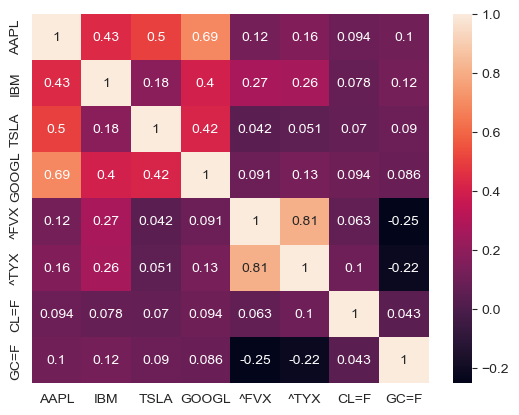

In [17]:
import seaborn as sns
sns.heatmap(ret.corr(), annot = True)

**Assignment 4.2**

모든 자산을 각각 12.5%씩 동일 가중으로 투자한다고 가정한 포트폴리오를 제작하세요.

In [18]:
equal_weigthed = (ret * (1 / 8)).sum(axis = 1)

**Assignment 4.2**

위험자산에 60%, 국채에 30%, 원자재에 10%를 투자한다고 가정한 포트폴리오를 제작하세요. 단, 각 블럭 별로는 동일 비중으로 투자한다고 가정합니다.

In [19]:
weights = [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.05, 0.05]
weighted_portfolio = (ret * weights).sum(axis = 1)

**Assignment 4.3**

S&P500 Index의 데이터를 불러온 뒤, 제작한 포트폴리오들과 비교하세요. 비교를 위해 matplotlib로 시각화합니다. 포트폴리오는 시장의 성과를 상회합니까?

In [20]:
index = yf.download('^GSPC', start_date, end_date).Close.pct_change(fill_method = None).dropna()

[*********************100%%**********************]  1 of 1 completed


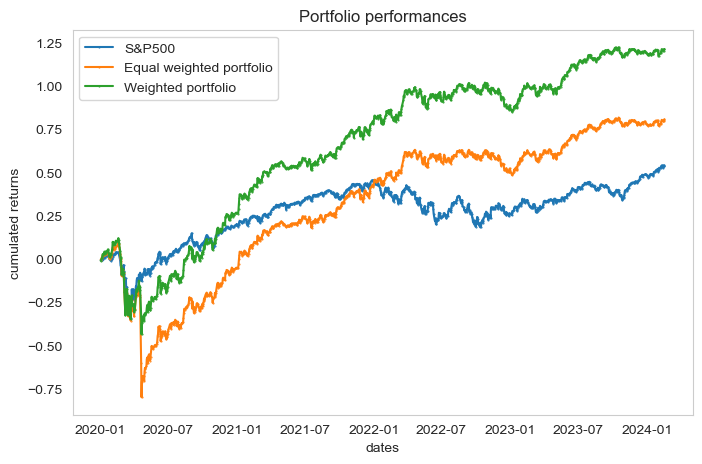

In [21]:
plt.figure(figsize = (8, 5))
plt.plot(index.index, index.cumsum(), marker = '.', ms = 1, label = 'S&P500')
plt.plot(equal_weigthed.index, equal_weigthed.cumsum(), marker = '.', ms = 1, label = 'Equal weighted portfolio')
plt.plot(weighted_portfolio.index, weighted_portfolio.cumsum(), marker = '.', ms = 1, label = 'Weighted portfolio')
plt.legend()
plt.xlabel('dates')
plt.ylabel('cumulated returns')
plt.title('Portfolio performances')
plt.grid(False)